In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import sys
import os
import curvedsky as cs
import pickle as pl

In [2]:
sys.path.append('../')

In [3]:
%load_ext autoreload
%autoreload 2
from simulation import SimExperimentFG
from filtering import Filtering
from quest import Reconstruction

In [5]:
rec = Reconstruction.from_ini('../LB_FG2.ini')
rec1 = Reconstruction.from_ini('../LB_FG2_n1.ini')


/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/S4BIRD/DELL/s1d1
/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps_c/CMB/
using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps_c/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/S4BIRD/N1/s1d1


input phi is from variying
input phi is constant


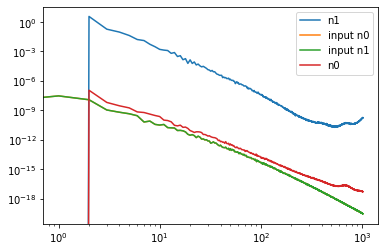

In [15]:
plt.loglog(rec1.get_phi_cl(0),label='n1')
plt.loglog(rec.get_input_phi_cl(0),label='input n0')
plt.loglog(rec1.get_input_phi_cl(0),label='input n1')
plt.loglog(rec.get_phi_cl(0),label='n0')
plt.legend()


In [7]:
resp_dir = '/global/cscratch1/sd/lonappan/S4BIRD/DELL/s1d1/'

In [17]:
r1 = pl.load(open(os.path.join(resp_dir,'response_wo_fgres.pkl'),'rb'))
r2 = pl.load(open(os.path.join(resp_dir,'response_w_fgres.pkl'),'rb'))
r3 = pl.load(open(os.path.join(resp_dir,'response_w_cmb.pkl'),'rb'))

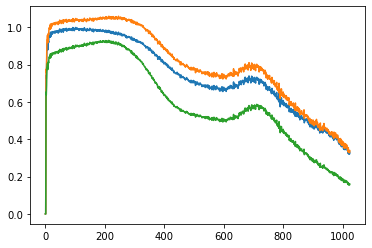

In [18]:
plt.plot(r1)
plt.plot(r2)
plt.plot(r3)


In [11]:
r2[:100]

array([0.        , 0.        , 0.77443216, 0.75741191, 0.81588116,
       0.93269528, 0.93526584, 0.95669772, 0.91709118, 0.94652074,
       0.96725977, 0.95914661, 0.9959856 , 0.9955313 , 0.99290652,
       1.0065947 , 0.98904907, 1.01695014, 0.9921288 , 1.00145245,
       1.00814619, 1.01925938, 1.0112202 , 1.00627709, 1.01766699,
       1.01554669, 1.02150205, 1.01510474, 1.02019517, 1.01634191,
       1.02103963, 1.02411165, 1.01286332, 1.01588292, 1.02477285,
       1.02426616, 1.02583656, 1.01826019, 1.01969795, 1.02618266,
       1.02042665, 1.02559948, 1.02441196, 1.0141765 , 1.02964363,
       1.02233349, 1.01950131, 1.02561787, 1.03805486, 1.02723732,
       1.03497361, 1.02991519, 1.03246161, 1.01952382, 1.02286558,
       1.03576566, 1.03011492, 1.03367183, 1.03332786, 1.03844639,
       1.02001101, 1.03975466, 1.02759422, 1.03264242, 1.03258631,
       1.03643446, 1.03935939, 1.03396369, 1.03455657, 1.03297558,
       1.0421329 , 1.02604989, 1.03688207, 1.02989313, 1.02823